In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import f_oneway

In [7]:
df = pd.read_csv('data anova - Copy.csv')
df.head()

,Class,Score
0,A,87.640523
1,A,74.001572
2,A,79.787380
3,A,92.408932
4,A,88.675580


In [8]:
class_counts = df['Class'].value_counts().reset_index()
class_counts

,index,Class
0,A,50
1,B,50
2,C,50


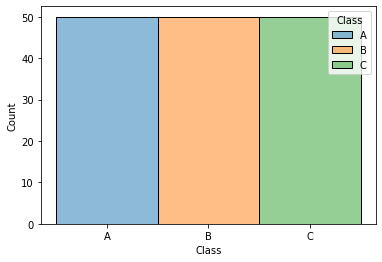

In [9]:
sns.histplot(data=df,x='Class',hue='Class')
plt.show()

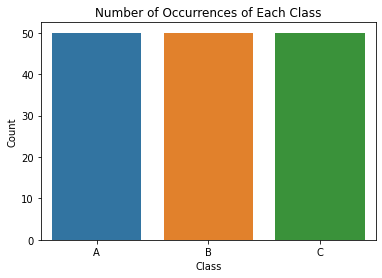

In [10]:
sns.barplot(data=class_counts, x='index', y='Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Number of Occurrences of Each Class')
plt.show()

In [11]:
a = df[df['Class'] == 'A']
a_score = a['Score']
a_score.head()

0    87.640523
1    74.001572
2    79.787380
3    92.408932
4    88.675580
Name: Score, dtype: float64

<AxesSubplot:xlabel='Score', ylabel='Count'>

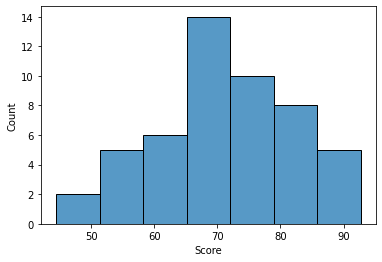

In [12]:
sns.histplot(df,x=a_score)

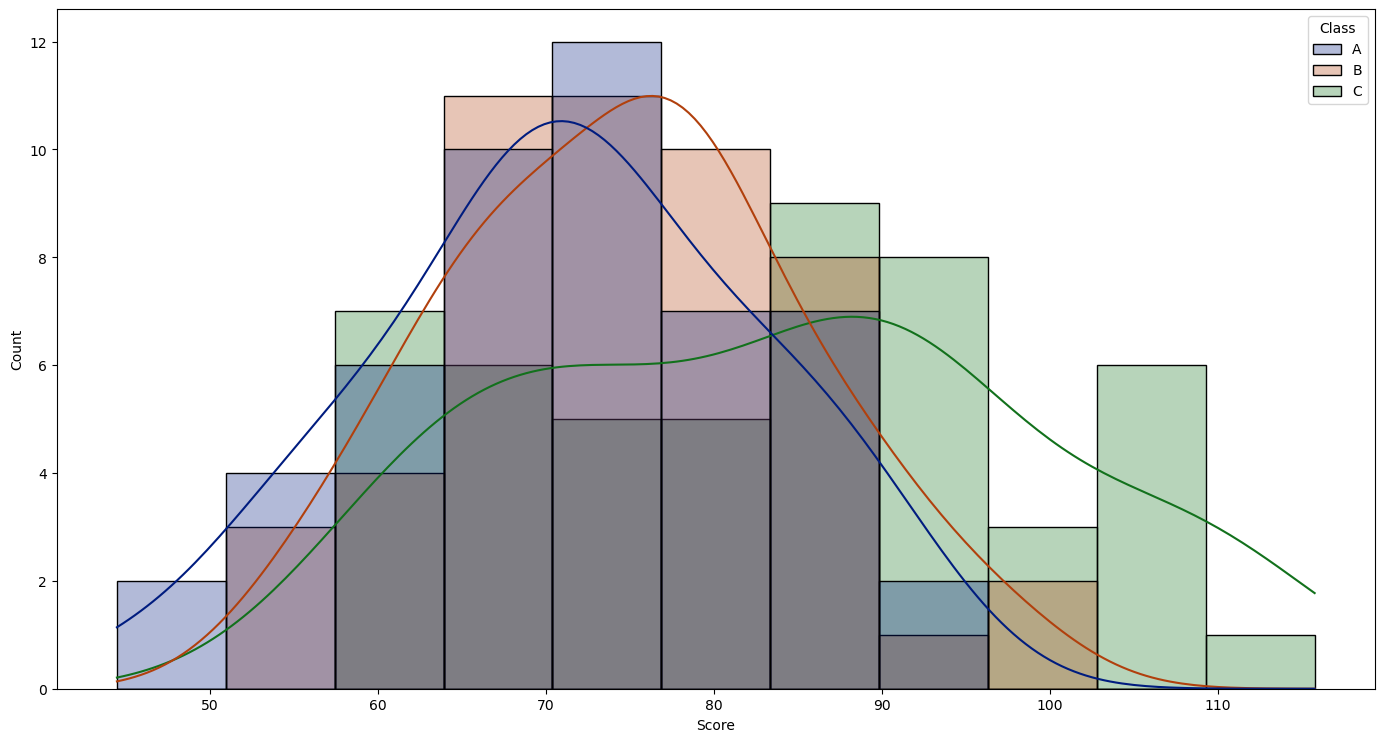

In [13]:
plt.figure(figsize=(17,9),dpi=100)
sns.histplot(data=df,x='Score' , hue='Class',kde=True,palette='dark',alpha=0.3)
plt.show()

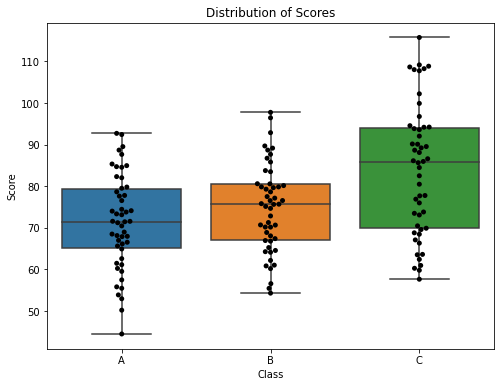

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='Score', data=df)
sns.swarmplot(x='Class', y='Score', data=df, color='black')
plt.xlabel('Class')
plt.ylabel('Score')
plt.title('Distribution of Scores')
plt.show()

<AxesSubplot:xlabel='Class', ylabel='Score'>

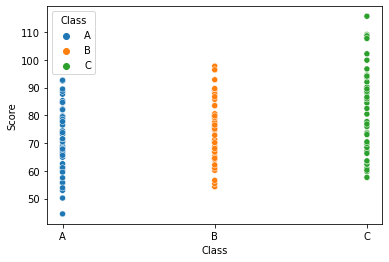

In [17]:
sns.scatterplot(data=df,x='Class' , y='Score' , hue='Class')

In [21]:
summary_stats = df.groupby('Class').agg({'Score': ['mean', 'std']})
print(summary_stats)

           Score           
            mean        std
Class                      
A      71.405593  11.369498
B      74.748681  10.510472
C      83.848023  15.639473


In [22]:
f_statistic, p_value = f_oneway(class_a, class_b, class_c)
print("F-Statistic:", f_statistic)
print("P-value:", p_value)


NameError: name 'class_a' is not defined

<AxesSubplot:xlabel='Class', ylabel='Score'>

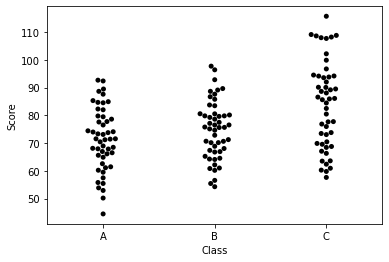

In [118]:
sns.swarmplot(x='Class', y='Score', data=df, color='black')


In [74]:
import statsmodels.api as sm

In [20]:
res = stat()
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

NameError: name 'stat' is not defined

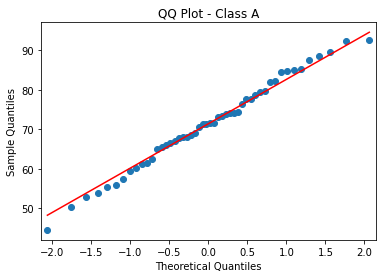

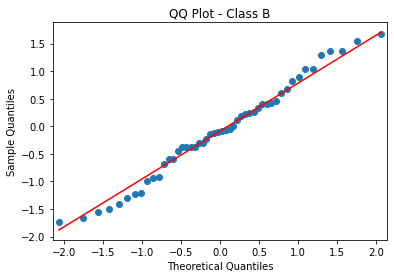

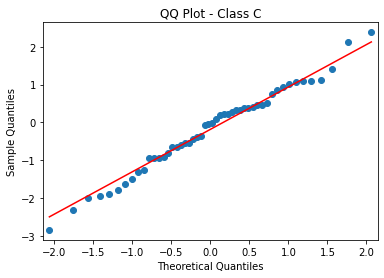

In [83]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Generate example data for classes A, B, and C
class_a = np.random.normal(loc=0, scale=1, size=50)
class_b = np.random.normal(loc=0, scale=1, size=50)
class_c = np.random.normal(loc=0, scale=1, size=50)

# Create QQ plots for each class
sm.qqplot(a_score, line='s')
plt.title('QQ Plot - Class A')
plt.show()

sm.qqplot(class_b, line='s')
plt.title('QQ Plot - Class B')
plt.show()

sm.qqplot(class_c, line='s')
plt.title('QQ Plot - Class C')
plt.show()


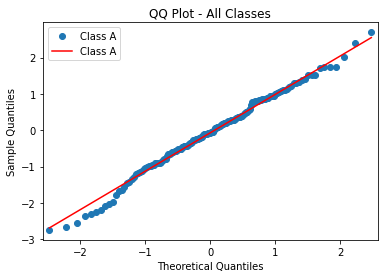

In [82]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Generate example data for classes A, B, and C
class_a = np.random.normal(loc=0, scale=1, size=50)
class_b = np.random.normal(loc=0, scale=1, size=50)
class_c = np.random.normal(loc=0, scale=1, size=50)

# Combine the data for all classes
all_data = np.concatenate([class_a, class_b, class_c])
labels = ['Class A'] * 50 + ['Class B'] * 50 + ['Class C'] * 50

# Create a single QQ plot for all classes
sm.qqplot(all_data, line='s')
plt.title('QQ Plot - All Classes')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.legend(labels, loc='best')
plt.show()


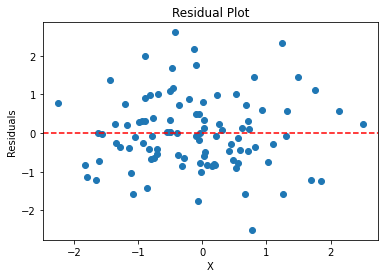

In [84]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Generate example data
x = np.random.randn(100)
y = 2 * x + np.random.randn(100)

# Fit the model
X = sm.add_constant(x)
model = sm.OLS(y, X)
results = model.fit()

# Calculate the residuals
residuals = results.resid

# Plot the residuals
plt.scatter(x, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


In [90]:
import pingouin as pg

result = pg.anova(data=df, dv='Score', between='Class')

# Print the ANOVA table
print(result)

  Source  ddof1  ddof2          F     p-unc       np2
0  Class      2    147  12.841917  0.000007  0.148733


In [91]:
data1 = pd.read_csv("https://reneshbedre.github.io/assets/posts/anova/onewayanova.txt", sep="\t")
data1.head()

,A,B,C,D
0,25,45,30,54
1,30,55,29,60
2,28,29,33,51
3,36,56,37,62
4,29,40,27,73


In [93]:
#reshape the d dataframe suitable for statsmodels package 
df_melt = pd.melt(data1.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D'])
# replace column names
df_melt.columns = ['index', 'treatments', 'value']

In [97]:
df_melt

,index,treatments,value
0,0,A,25
1,1,A,30
2,2,A,28
3,3,A,36
4,4,A,29
5,0,B,45
6,1,B,55
7,2,B,29
8,3,B,56
9,4,B,40


In [95]:
df_melt['treatments'].value_counts()

A    5
B    5
C    5
D    5
Name: treatments, dtype: int64

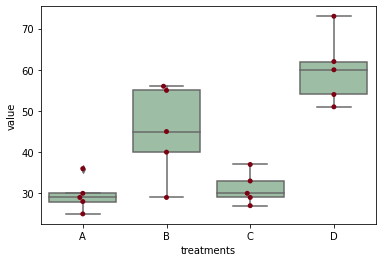

In [96]:
# generate a boxplot to see the data distribution by treatments. Using boxplot, we can 
# easily detect the differences between different treatments
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='treatments', y='value', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x="treatments", y="value", data=df_melt, color='#7d0013')
plt.show()

In [98]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(data1['A'], data1['B'], data1['C'], data1['D'])
print(fvalue, pvalue)
# 17.492810457516338 2.639241146210922e-05

17.492810457516338 2.639241146210922e-05


In [99]:
# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('value ~ C(treatments)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(treatments),3010.95,3.0,17.49281,0.000026
Residual,918.00,16.0,NaN,NaN


In [102]:
# ANOVA table using bioinfokit v1.0.3 or later (it uses wrapper script for anova_lm)
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=df_melt, res_var='value', anova_model='value ~ C(treatments)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(treatments),3.0,3010.95,1003.650,17.49281,0.000026
Residual,16.0,918.00,57.375,NaN,NaN


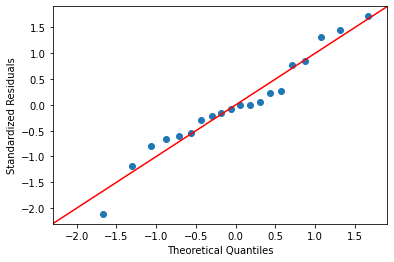

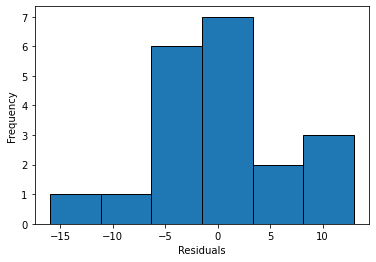

In [103]:
# QQ-plot
import statsmodels.api as sm
import matplotlib.pyplot as plt
# res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()